In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df1=pd.read_csv("ev data.csv")
df1.head()

,Age,Gender,Income,Geography,Preferred_EV_Type,Loan,Education
0,58,Male,57864,Rural,Sedan,Car Loan,Diploma
1,64,Male,53347,Suburban,Sedan,Car Loan,Master's
2,50,Non-Binary,144759,Rural,Hatchback,Car Loan,Doctorate
3,43,Female,123791,Suburban,Truck,No Loan,Master's
4,43,Male,123432,Suburban,SUV,Car Loan,High School


In [6]:

df2=pd.read_csv("ev market.csv")
df2.head()

,Company Name,Vehicle Type,Vehicle Sales,Ages (Between),Income,Geographical Location,Wheels
0,Tata Motors,Electric Car,14564,18-35,687646,Hubli,Four-Wheeler
1,Ola Electric,Electric Auto,2429,18-35,1552750,Kozhikode,Two-Wheeler
2,Mahindra Electric,Electric Car,9568,25-45,1010401,Pune,Four-Wheeler
3,Ather Energy,Scooter,14845,30-50,1530766,Coimbatore,Two-Wheeler
4,Hero Electric,Scooter,13796,20-40,922869,Bangalore,Two-Wheeler


In [7]:
import pandas as pd
df1=pd.read_csv("ev data.csv")
df1.corr(numeric_only=True)

,Age,Income
Age,1.000000,-0.175993
Income,-0.175993,1.000000


In [8]:
import pandas as pd
df2=pd.read_csv("ev market.csv")
df2.corr(numeric_only=True)

,Vehicle Sales,Income
Vehicle Sales,1.000000,0.008137
Income,0.008137,1.000000


In [4]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (100, 7)
DF2 Shape:  (101, 7)


In [6]:
print(' DATASET 1:')
print(df1.info())
print(' DATASET 2:')
print(df2.info())
     

 DATASET 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                100 non-null    int64 
 1   Gender             100 non-null    object
 2   Income             100 non-null    int64 
 3   Geography          100 non-null    object
 4   Preferred_EV_Type  100 non-null    object
 5   Loan               100 non-null    object
 6   Education          100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB
None
 DATASET 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Company Name           101 non-null    object
 1   Vehicle Type           101 non-null    object
 2   Vehicle Sales          101 non-null    int64 
 3   Ages (Between)         101 non-

In [26]:
df1.columns.values.tolist()

['Age',
 'Gender',
 'Income',
 'Geography',
 'Preferred_EV_Type',
 'Loan',
 'Education']

In [27]:
df2.columns.values.tolist()

['Company Name',
 'Vehicle Type',
 'Vehicle Sales',
 'Ages (Between)',
 'Income',
 'Geographical Location',
 'Wheels']

In [11]:
d1 = df1.describe()
d2 = df2.describe() 
display( d1,d2)


,Age,Income
count,100.000000,100.000000
mean,41.690000,117458.950000
std,14.818563,48176.533386
min,18.000000,31277.000000
25%,28.000000,74386.750000
50%,41.000000,118486.000000
75%,56.000000,156788.500000
max,65.000000,197533.000000


,Vehicle Sales,Income
count,101.000000,1.010000e+02
mean,8260.267327,1.070446e+06
std,3972.953896,4.000992e+05
min,1005.000000,3.572080e+05
25%,4850.000000,7.365100e+05
50%,8735.000000,1.115476e+06
75%,10843.000000,1.430262e+06
max,14861.000000,1.693175e+06


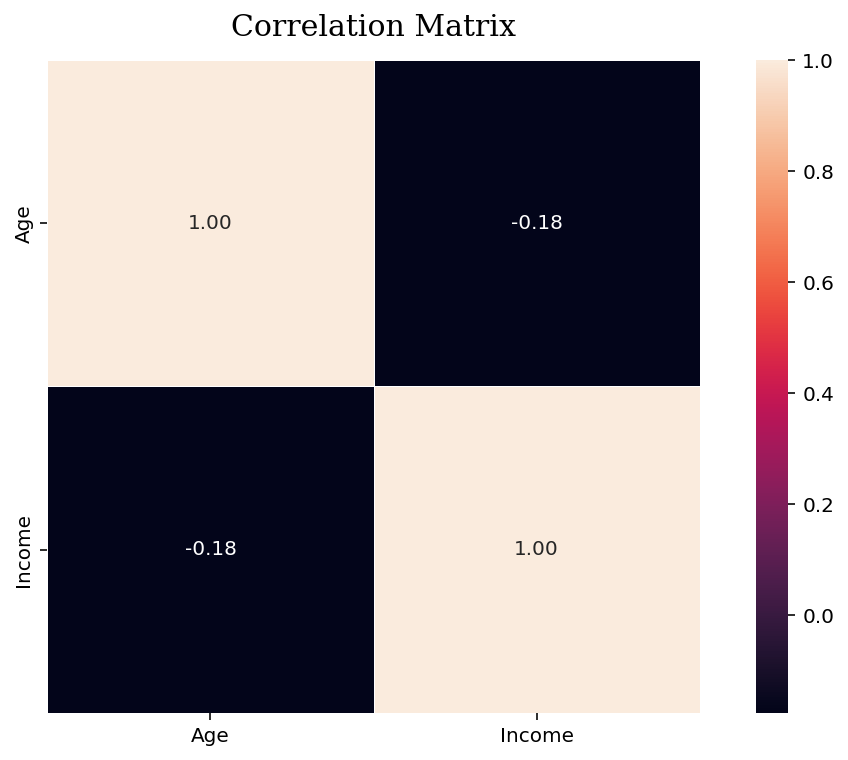

In [18]:
corr_df1 = df1[["Age", "Income"]] 
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_df1.corr(), annot=True, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

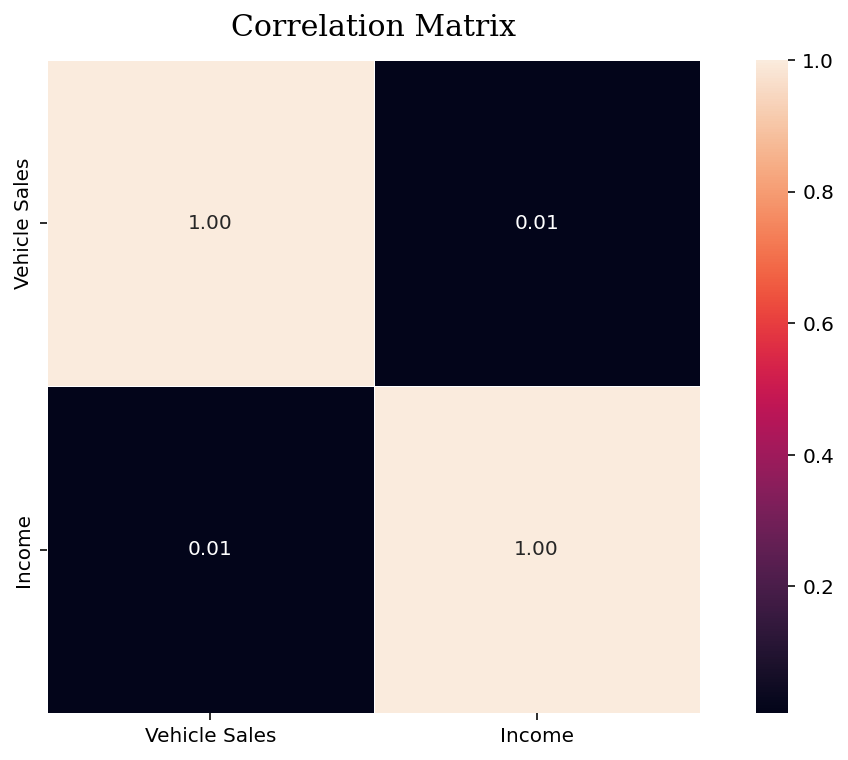

In [23]:
corr_df2 = df2[["Vehicle Sales","Income"]] 
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_df2.corr(), annot=True, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

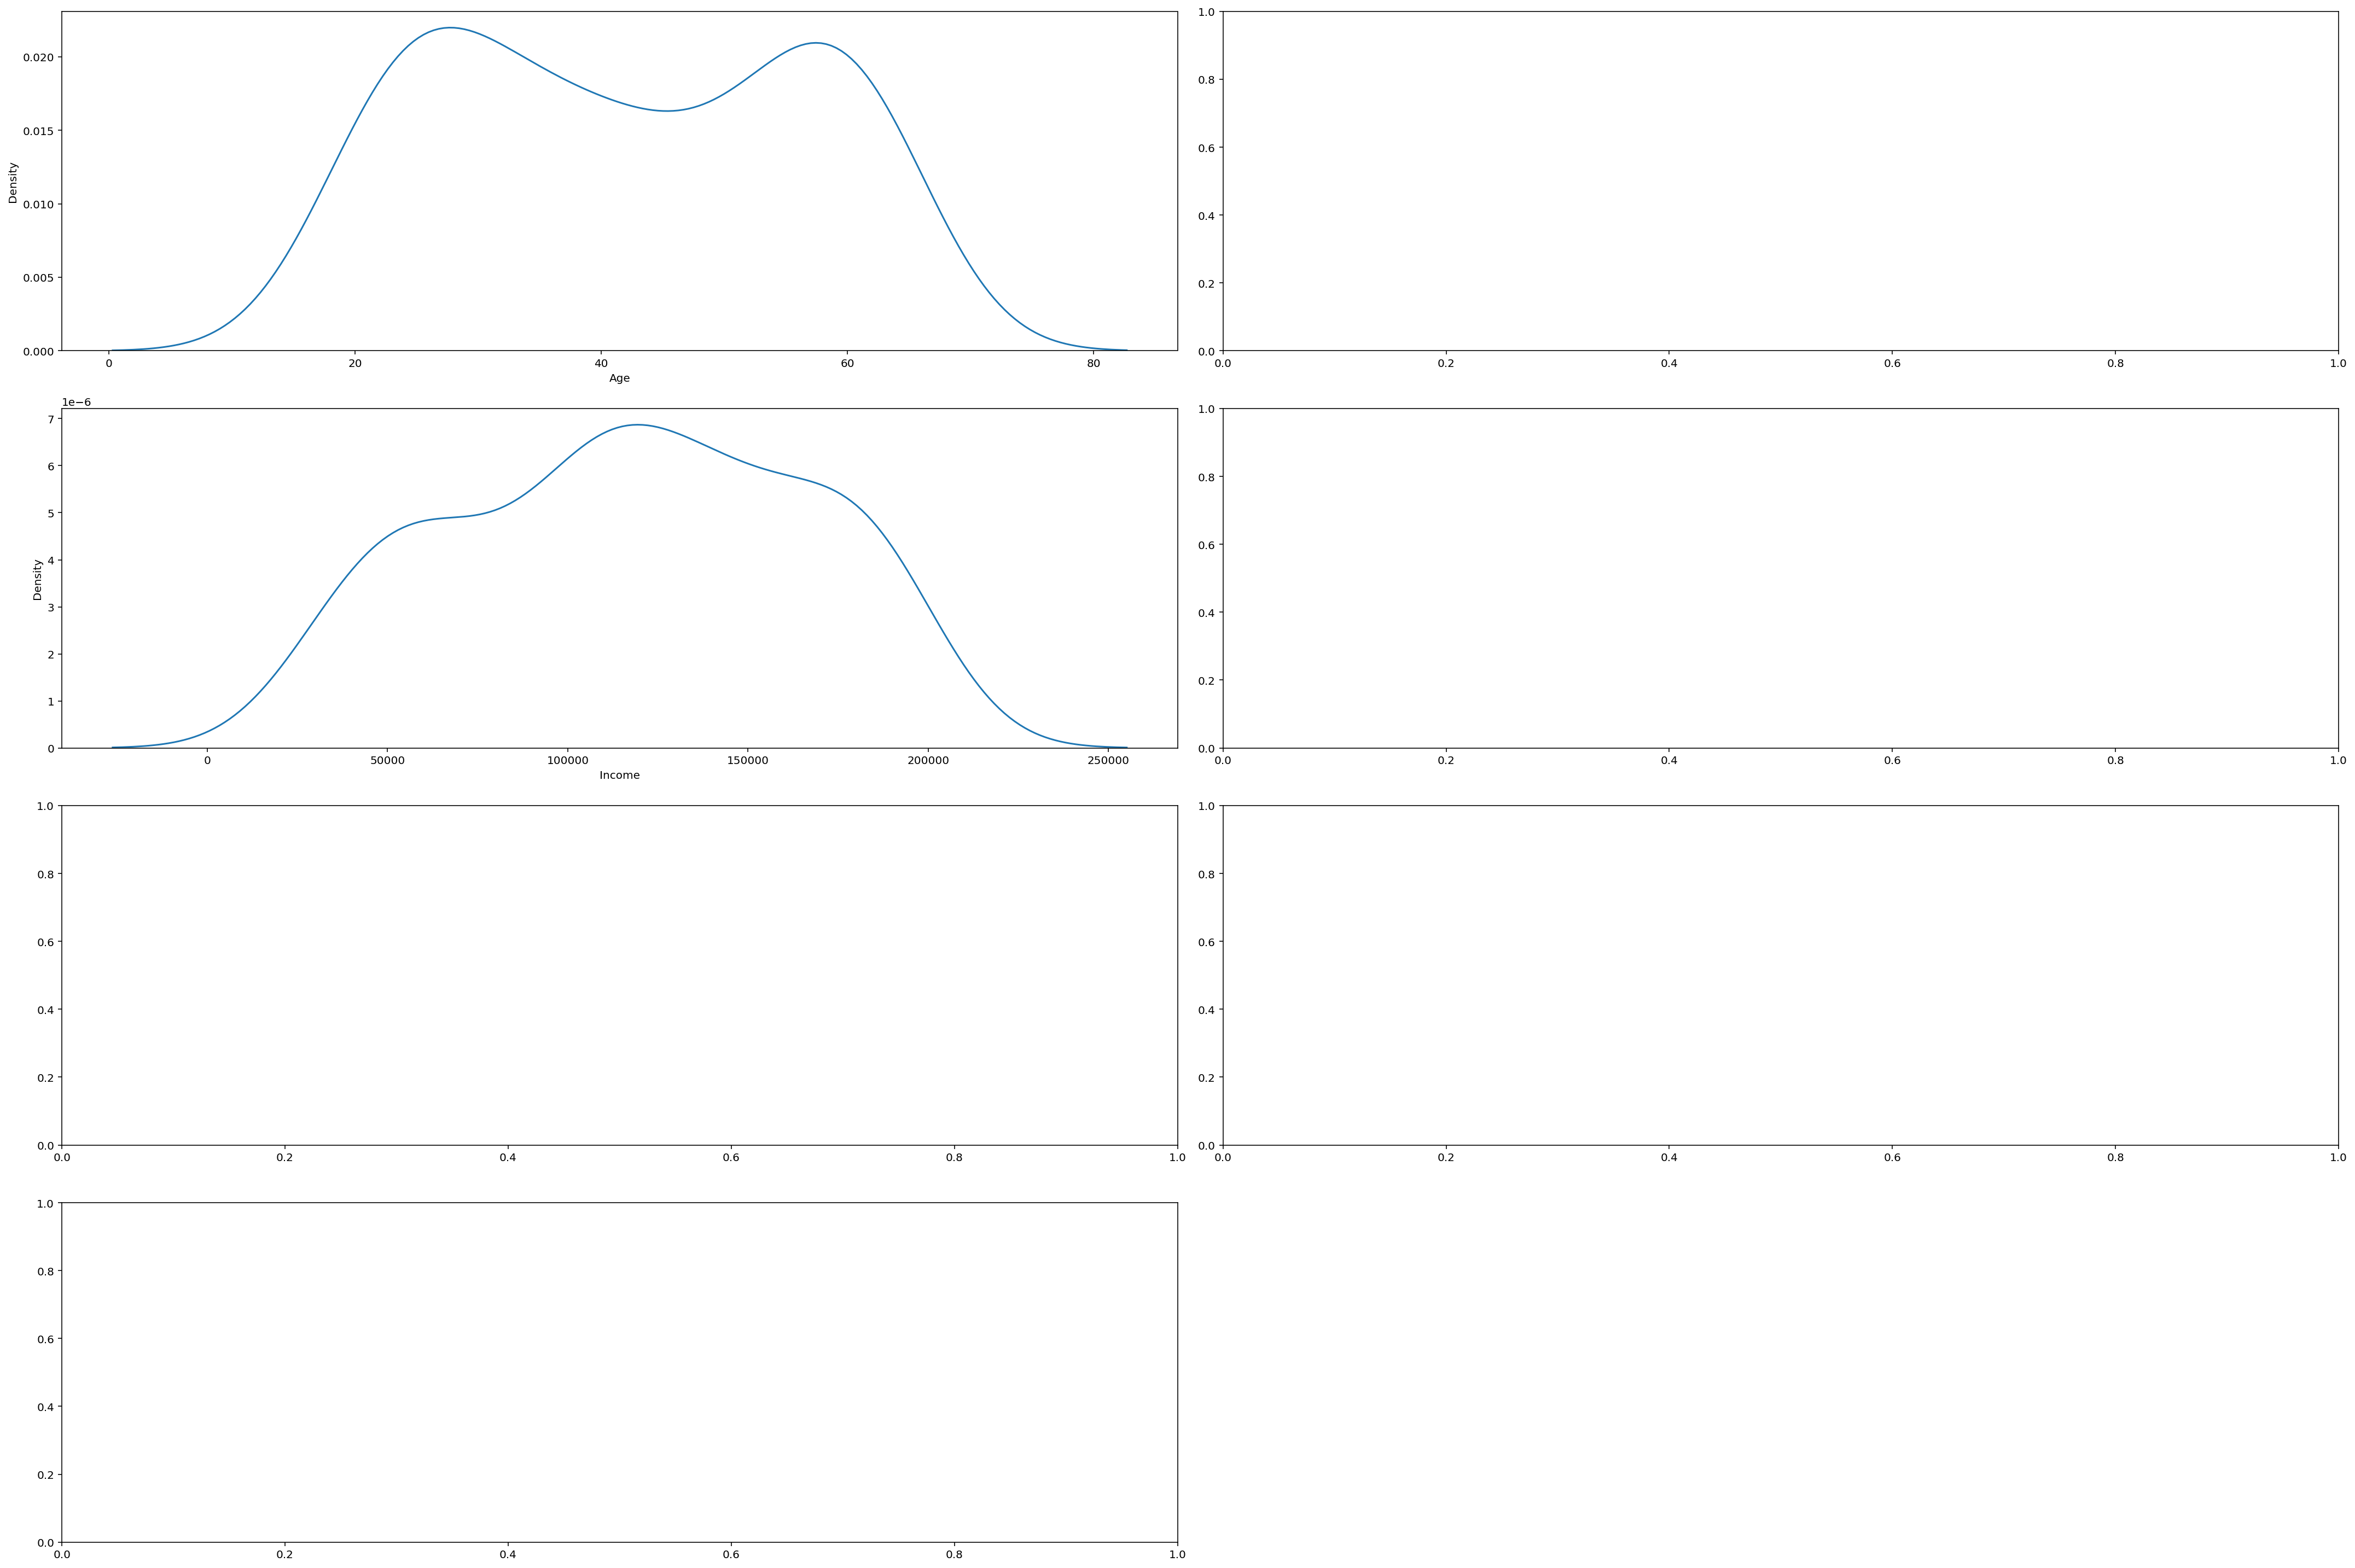

In [29]:
fig, axes = plt.subplots(9, 2, figsize=(30, 45))
axes = axes.flatten()
for i, col in enumerate(df1.columns):
    if df1[col].dtype != 'object':
        axes[i].set_xlabel(col)
        sns.kdeplot(df1[col], ax=axes[i])  

for j in range(len(df1.columns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

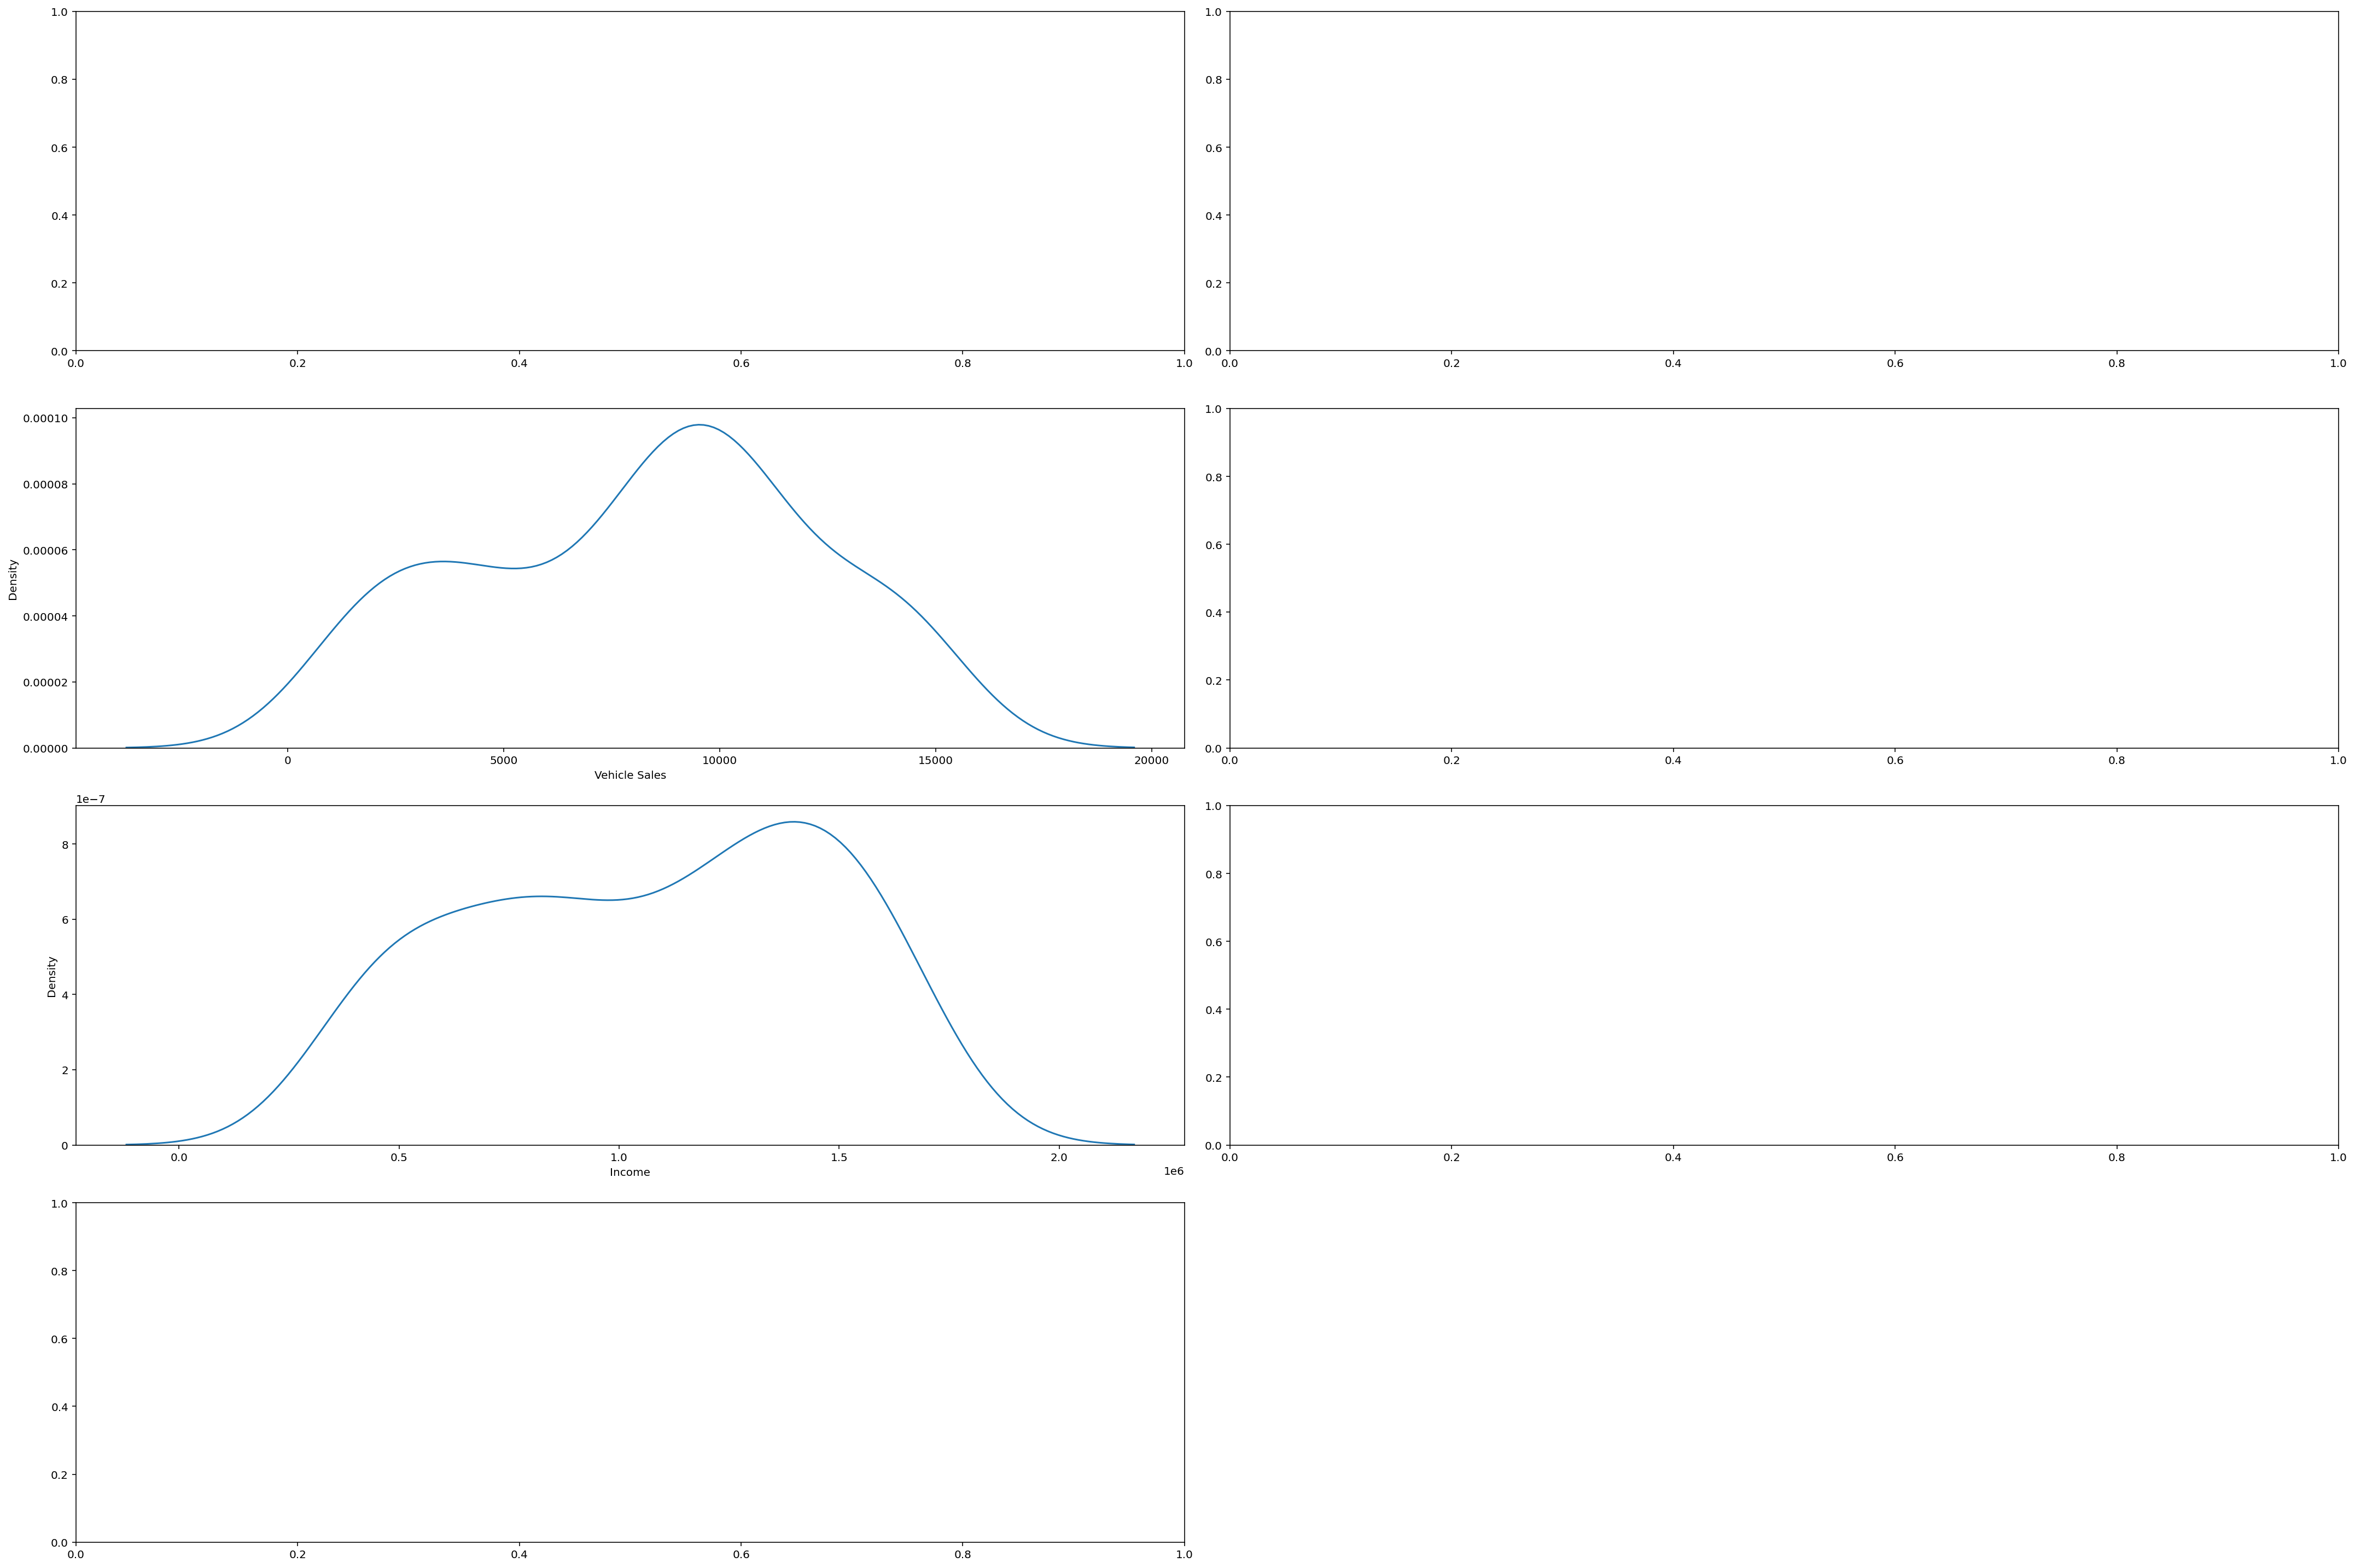

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df2=pd.read_csv("ev market.csv")

fig, axes = plt.subplots(9, 2, figsize=(30, 45))
axes = axes.flatten()

for i, col in enumerate(df2.columns): 
    if df2[col].dtype != 'object':
        axes[i].set_xlabel(col)
        sns.kdeplot(df2[col], ax=axes[i])

for j in range(len(df2.columns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

<Axes: title={'center': 'Distribution of age'}, xlabel='No of Samples'>

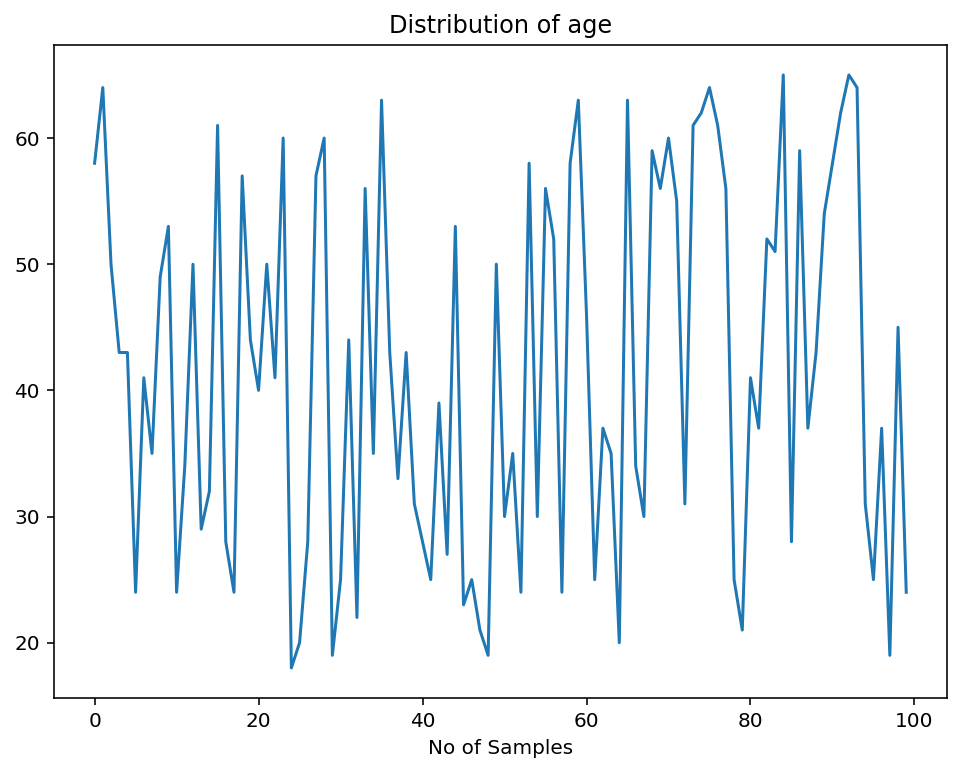

In [20]:
df1 = pd.read_csv("ev data.csv")
df1['Age'].plot(xlabel='No of Samples', y='Age', title='Distribution of age')

<Axes: title={'center': 'Vehicle sales'}, xlabel='No of Sales'>

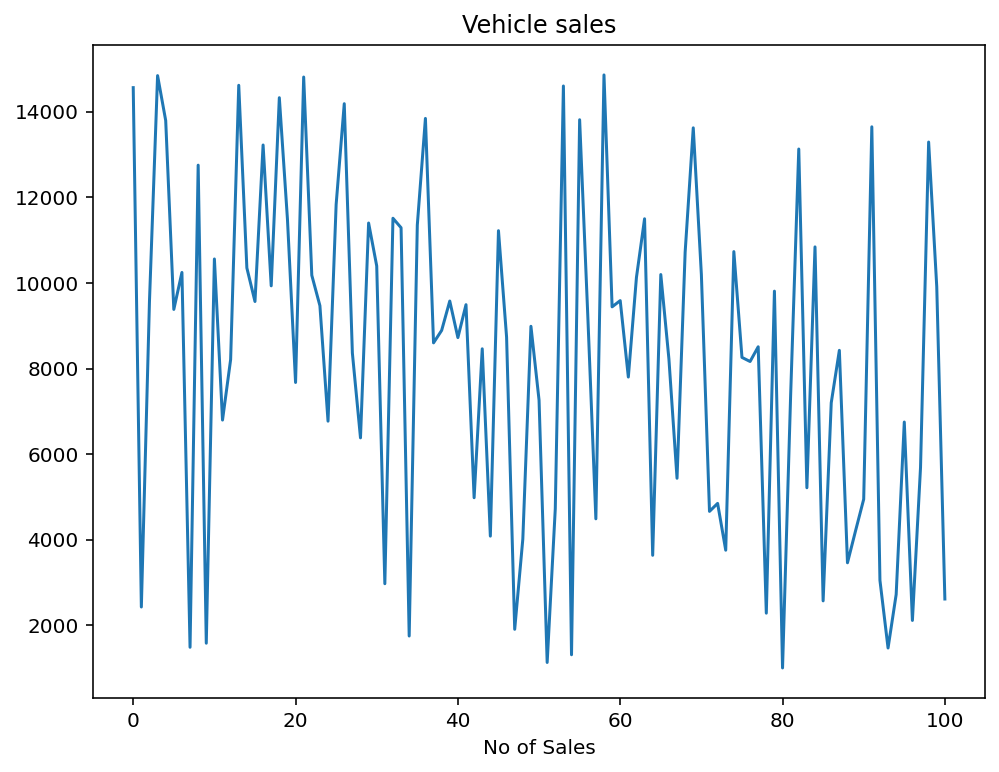

In [24]:
df2 = pd.read_csv("ev market.csv")
df2['Vehicle Sales'].plot(xlabel='No of Sales', title='Vehicle sales')

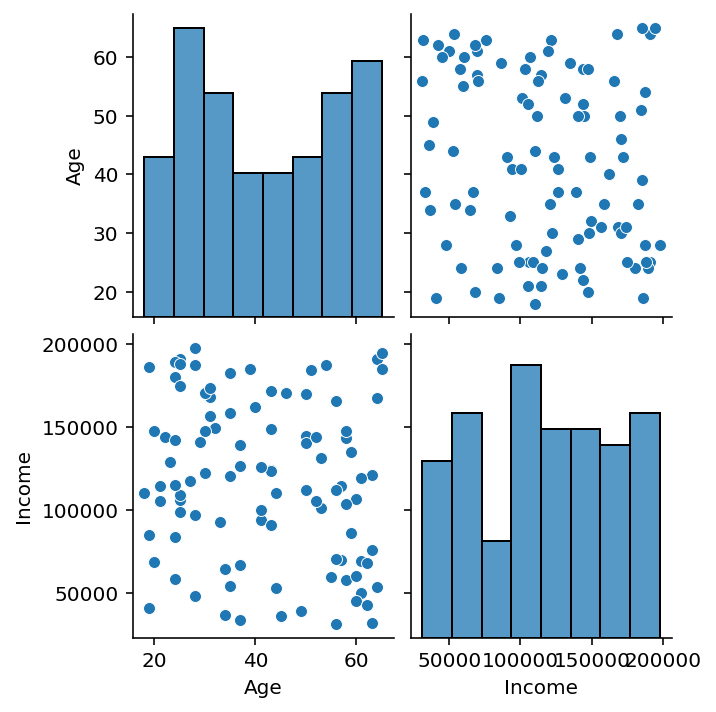

In [25]:
sns.pairplot(df1)


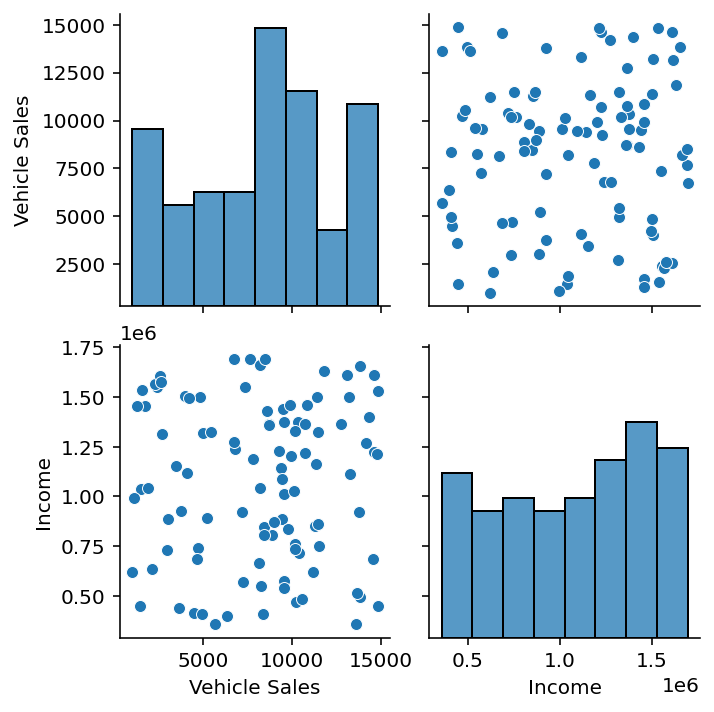

In [26]:
sns.pairplot(df2)


/tmp/ipykernel_301/1405335141.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1['Age'], palette='pastel')


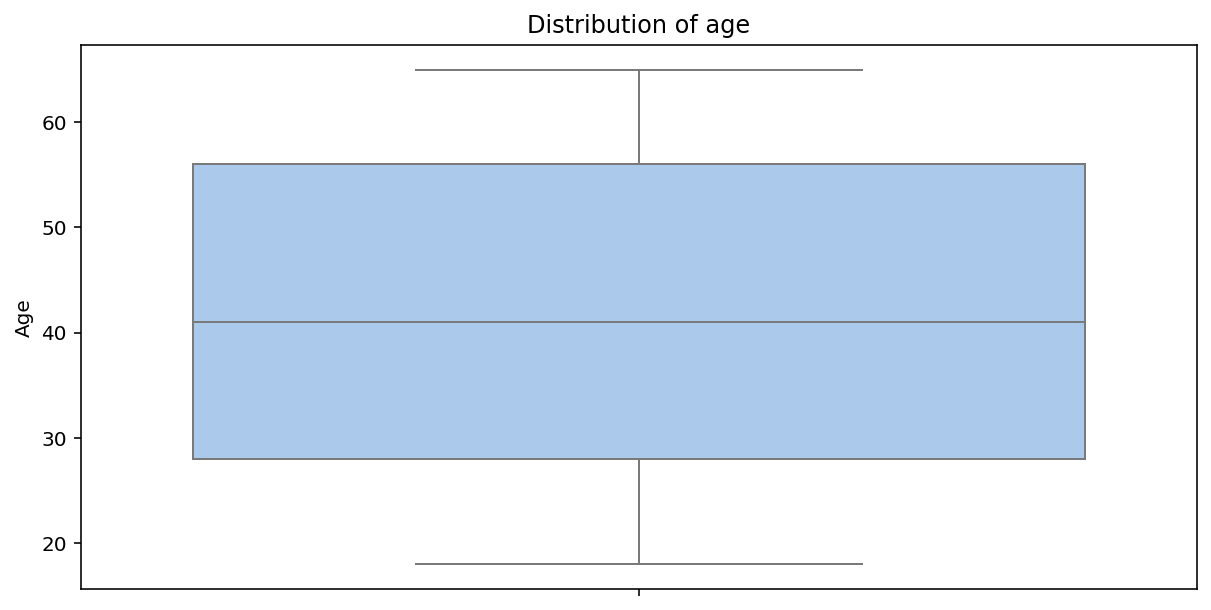

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("ev data.csv")
plt.figure(figsize=(10, 5))
sns.boxplot(df1['Age'], palette='pastel')
plt.title('Distribution of age')
plt.show()

/tmp/ipykernel_301/498913726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1['Income'], palette='pastel')


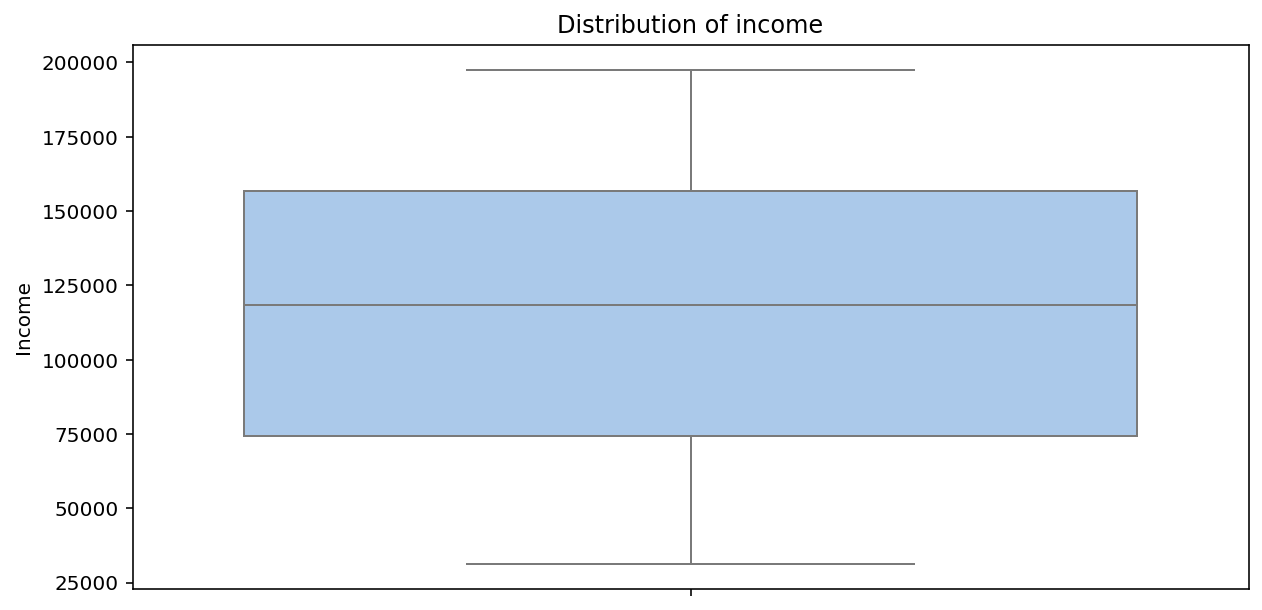

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("ev market.csv")
plt.figure(figsize=(10, 5))
sns.boxplot(df1['Income'], palette='pastel')
plt.title('Distribution of income')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

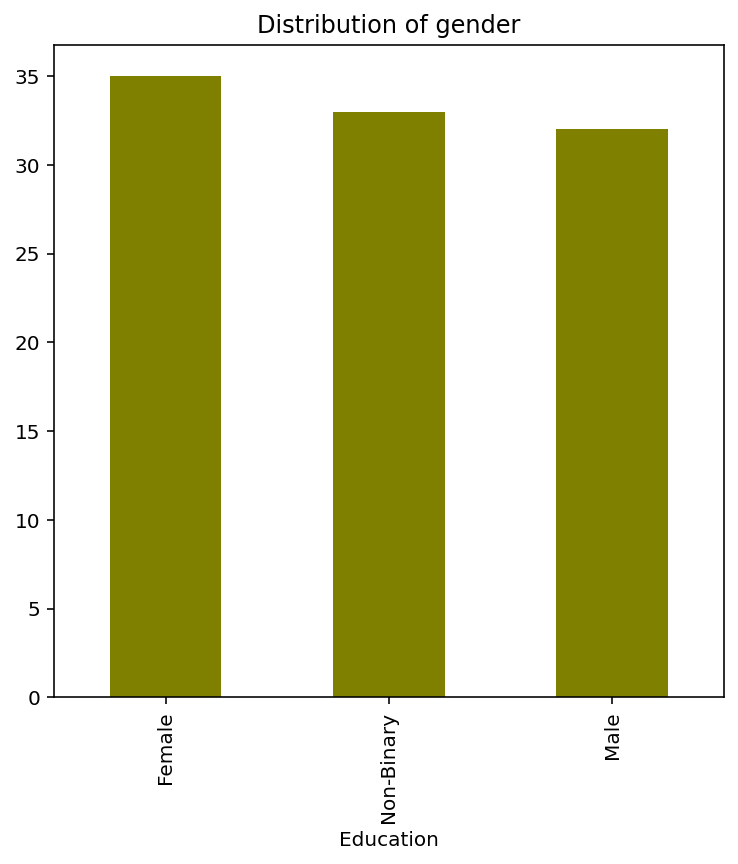

In [14]:
plt.figure(figsize=(6,6))
df1['Gender'].value_counts().plot(kind='bar',color='olive')
plt.title('Distribution of gender')
plt.xlabel('Education')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

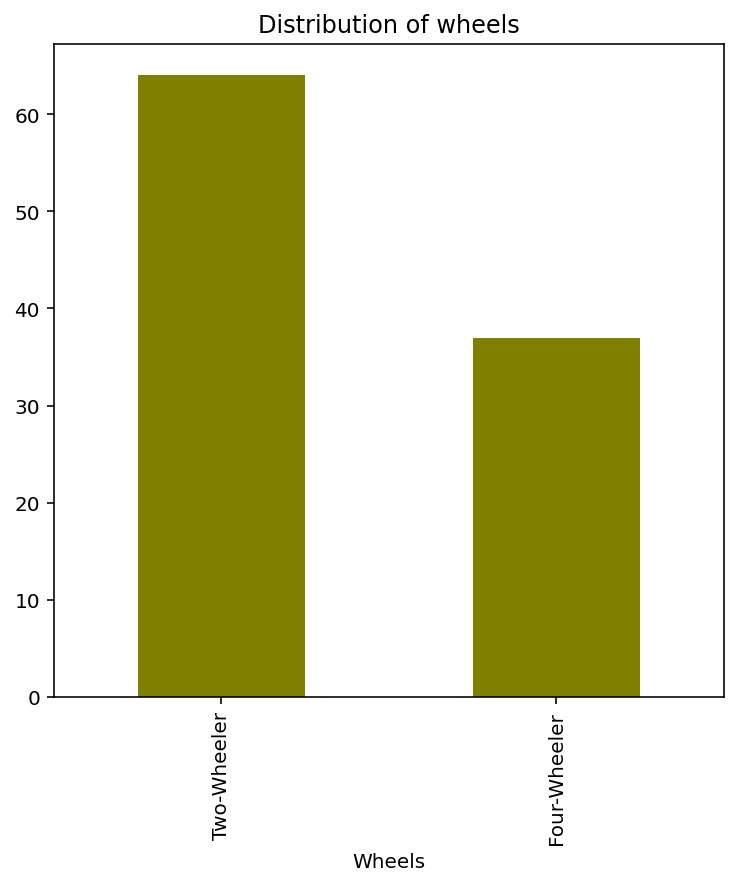

In [16]:

plt.figure(figsize=(6,6))
df2['Wheels'].value_counts().plot(kind='bar',color='olive')
plt.title('Distribution of wheels')
plt.show

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming df1 and df2 have already been defined
df1 = df1.dropna(subset=['Age', 'Income'])
df2 = df2.dropna(subset=['Vehicle Sales'])

# Align df2 with df1's index
df2 = df2.loc[df1.index]

X = df1[['Age', 'Income']]
y = df2['Vehicle Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

        1005       0.00      0.00      0.00       1.0
        1583       0.00      0.00      0.00       1.0
        2115       0.00      0.00      0.00       1.0
        2429       0.00      0.00      0.00       0.0
        2572       0.00      0.00      0.00       0.0
        2723       0.00      0.00      0.00       0.0
        2973       0.00      0.00      0.00       1.0
        3462       0.00      0.00      0.00       1.0
        3756       0.00      0.00      0.00       1.0
        4085       0.00      0.00      0.00       1.0
        4213       0.00      0.00      0.00       0.0
        4489       0.00      0.00      0.00       0.0
        4663       0.00      0.00      0.00       0.0
        4850       0.00      0.00      0.00       1.0
        4948       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # missing import

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' if needed
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluating the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))  # Added closing parenthesis


Classification Report:
               precision    recall  f1-score   support

        1005       0.00      0.00      0.00       1.0
        1133       0.00      0.00      0.00       0.0
        1313       0.00      0.00      0.00       0.0
        1471       0.00      0.00      0.00       0.0
        1488       0.00      0.00      0.00       0.0
        1583       0.00      0.00      0.00       1.0
        1751       0.00      0.00      0.00       0.0
        1908       0.00      0.00      0.00       0.0
        2115       0.00      0.00      0.00       1.0
        2285       0.00      0.00      0.00       0.0
        2429       0.00      0.00      0.00       0.0
        2973       0.00      0.00      0.00       1.0
        3462       0.00      0.00      0.00       1.0
        3756       0.00      0.00      0.00       1.0
        4085       0.00      0.00      0.00       1.0
        4213       0.00      0.00      0.00       0.0
        4663       0.00      0.00      0.00       0.0
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_